In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import pandas as pd

In [4]:
data = pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X  = data.drop(['label'],axis = 1)
X.head()
y = data['label']
a = [X.isna().sum()>1]





In [13]:
a

[1x1      False
 1x2      False
 1x3      False
 1x4      False
 1x5      False
          ...  
 28x24    False
 28x25    False
 28x26    False
 28x27    False
 28x28    False
 Length: 784, dtype: bool]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1175
           1       0.80      0.94      0.86      1322
           2       0.84      0.32      0.46      1174
           3       0.76      0.38      0.51      1219
           4       0.87      0.19      0.31      1176
           5       0.62      0.06      0.10      1104
           6       0.66      0.95      0.78      1177
           7       0.93      0.27      0.42      1299
           8       0.28      0.62      0.39      1160
           9       0.37      0.96      0.54      1194

    accuracy                           0.56     12000
   macro avg       0.69      0.56      0.52     12000
weighted avg       0.69      0.56      0.52     12000



In [16]:
means = nb.theta_
means

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 784))

In [18]:
vars = nb.var_
vars

array([[1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05],
       [1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05],
       [1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05],
       ...,
       [1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05],
       [1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05],
       [1.29771865e-05, 1.29771865e-05, 1.29771865e-05, ...,
        1.29771865e-05, 1.29771865e-05, 1.29771865e-05]], shape=(10, 784))

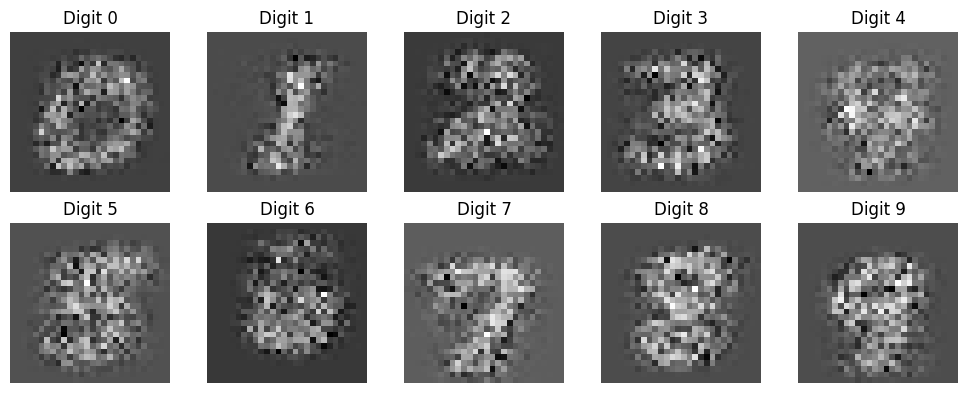

In [45]:
def generate_digit_sample(digit):
    sample = np.random.normal(loc = means[digit],scale =np.sqrt(vars[digit]))
    img = sample.reshape(28,28)
    return img


plt.figure(figsize=(10,4))
for digit in range(10):
    img = generate_digit_sample(digit)
    ax = plt.subplot(2,5,digit+1)
    ax.imshow(img,cmap = 'gray')
    ax.set_title(f"Digit {digit}")
    ax.axis('off')
plt.tight_layout()
plt.show()



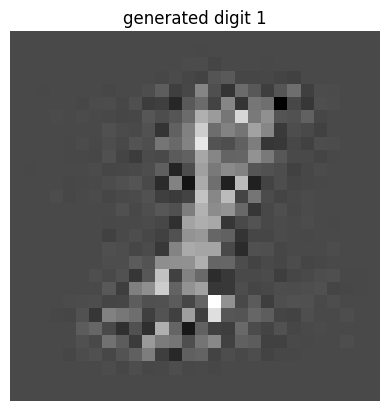

In [ ]:
chosen_class = 1
mu = nb.theta_[chosen_class]
sigma = np.sqrt(nb.var_[chosen_class])
sample = np.random.normal(mu,sigma)
plt.imshow(sample.reshape(28,28),cmap='grey')
plt.title(f"generated digit {chosen_class}")
plt.axis("off")
plt.show()
